# Commuting: How We Get to Work, and Why It Matters
In this report, we use data from the 2021 American Time Use Survey (ATUS) to analyze the role that commute time – time spent traveling to and from work – plays in the lives of Americans.

First, we investigate factors that influence commuting. Who spends a lot of time traveling to work, and why? Are those long trips about making more money? Are they about having second jobs? Do such factors mean more in the country or in the city? Do they mean more for men or for women?

Next we turn to the effects of commute time on general well being. Is work travel time correlated with life satisfaction, with general health, with happiness, sadness, or stress?

After that, we focus more closely on the quality of a commute over its quantity. After all, an hour driving through the countryside is very different from 20 minutes dashing through cutthroat traffic. Do those who report high levels of stress while commuting see downstream effects on their health and well-being?

An obvious way that commuting might affect one's life is that the hour you spend getting to work is another hour you could have spent sleeping! We look in detail at how sleep time is affected by commuting, both in terms of the length of the trip and how much stress it causes the commuter.

# Questions for Analysis

#### 1. Socioeconomic Factors and Commute Time
Which socioeconomic factors are correlated with longer and shorter commute times? We investigate how commute time is influenced by age, income level, and having multiple jobs, as well as considering the possible modifying effects of sex and metropolitan status.
   
#### 2. Commute Time and Well-Being
How does total commute time relate to various well-being factors? We study the relation between total commute time and five different outcome variables: life rating, general health, and average reported levels of happiness, sadness, and stress.

#### 3. Commuting Stress and Well-Being
How does the stress level of commuting correlate with commuters' life ratings, general health, and hypertension? To control for the effect of stress unrelated to commuting, we analyze three groups of respondents: those who reported stress during their commutes to be less than, similar to, or greater than, their general stress levels throughout the day.

#### 4. Commuting and Sleep
How does commuting affect sleep? We examine the amount of sleep that respondents reported in 24 hours, investigating the effects of total commute time and of reported commuting stress.

# Data Source

## What Is the ATUS?

The American Time Use Survey has been conducted by the US Bureau of Labor Statistics (BLS) every year since 2003. In it, households are selected from those that have recently completed all eight months of the Current Population Survey (CPS). Households are chosen to reflect a demographic balance of the US population.

From each selected household, one person is chosen for the ATUS to keep a "diary" for one day, noting each activity they perform, and how long they spend doing it. Their responses are coded and stored in a database, providing a rich gallery of snapshots of American life, crossing boundaries of geography, age, sex, occupation, and socio-economic status.

## Why 2021?

In some years, most recently in 2021, the BLS adds a module to the survey called the Well Being Module. This is an additional survey administered to a subset of ATUS participants, in which they are asked, not just about their activities on "diary day", but also about their general health and well being. They are also asked how they felt during certain reported activities, such as driving, relaxing at home, or socializing. For each selected activity, participants rate their feelings of happiness, sadness, fatigue, stress, and sense of meaning.

We chose the 2021 ATUS as our dataset, because the Well Being Module offers additional insights. With this data, we can go beyond learning who commutes and how long they commute. We can begin to explore deeper questions that illuminate the relationship between commuting and other aspects of commuters' lives, such as well-being, health, and happiness.



# Data Collection and Storage

## Obtaining the Data for Analysis

ATUS data frome each year's survey is publicly available on the Bureau of Labor Statistics' website. Everything we needed for this project can be found on the pages

* [American Time Use Survey—2021 Microdata Files](https://www.bls.gov/tus/data/datafiles-2021.htm), and
* [American Time Use Survey Well-Being Module Microdata Files](https://www.bls.gov/tus/data/wbdatafiles-2021.htm)

On those pages can be found:

* The microdata files themselves. These are zip files, and when extracted, each one yields: a data file (.DAT) which is a standard csv table, a text file (.TXT) containing a brief dictionary of variables used, and three program files (.SAS, .SPS, and .DO) to integrate the data file with various kinds of statistical software.

  The specific microdata files we downloaded for this study are:

  - **Respondent file:** This file contains information about each respondent, including certain demographics and work-force status
  - **Roster file:** This file contains information about each respondent's household, such as the number and ages of the people they live with.
  - **ATUS-CPS file:** This file contains more detailed demographic information about the respondent and their household, pulled from responses to CPS surveys in previous months.
  - **Activity file:** This file is the heart of the ATUS. It contains the contents of each respondent's diary, including start times and stop times for each activity, with the activity type coded in a three-tiered hierarchy.
  - **Well-Being Respondent file:** This file contains responses to general survey questions that were part of the Well-Being Module
  - **Well-Being Activity file:** This file contains data about respondents' reported moods during activities, and is keyed to the main activity file.
  
* Data dictionaries (.PDF): These extremely useful documents detail every variable found in the microdata files, including information about skip patterns on the survey, that is, rules about which questions to skip depending on previous responses. Here we also see descriptions of codes that reflect missing answers and other anomalies.
  
* Coding lexicon (.PDF): The coding lexicon is an essential tool for reading the activity file. It explains the three-tier hierarchy used to code each activity, including examples and notes.
  
* Questionnaires (.PDF): These contain the actual questions asked of the respondents, as well as skip patterns, so we can see the structure of the survey as it was administered.
  
* ATUS User's Guide (.PDF): - This compendious tome tells us all about the ATUS, including its history, sample selection, administration, and many details about all of the files listed above.

## Data Handling and Storage

Having downloaded the microdata files, we uploaded them to a project in BigQuery. There we were able to examine each data set, become familiar with their structures, and run some exploratory queries to see whether we had sufficient data to address our questions.



# Data Preparation

Our first step was to filter the large ATUS datasets for the purposes of considering our questions. We chose to only look at data from adults (18+), with full time jobs, who reported commuting ("Travel related to work") on their diary days. We ended up using three different samples from this group, due to the nature of information needed for each analysis.

In the following sections, we discuss how each sample was selected, based on the presence of needed data.

## First Sample

To investigate **Socioeconomic Factors and Commute Time**, we were able to look at nearly all respondents from our filtered dataset, because data for age, multiple jobs, income level, sex, and metropolitan status was available for every respondent. Of course, within our filtered group, every respondent had a non-zero commute time.

We obtained this sample using the following SQL query, run in BigQuery. In this query, we first filter for commuting adults with full-time jobs, then calculate total commute time, and then select the sample for export and analysis. We obtained a sample of N=1574 respondents. After uploading the sample to a spreadsheet, we performed additional minor filtering for anomalies, which will be discussed in the data cleaning section below.

```sql
WITH qual1 AS (
  SELECT resp.TUCASEID AS caseid
  FROM `sandbox-project-418506.ATUS.respondent_file` AS resp
    JOIN `sandbox-project-418506.ATUS.roster_file` AS rost
      ON resp.TUCASEID = rost.TUCASEID
  WHERE rost.TEAGE >= 18 AND rost.TULINENO = 1 AND resp.TRDPFTPT = 1
),

qual2 AS (
  SELECT DISTINCT TUCASEID AS caseid
  FROM `sandbox-project-418506.ATUS.activity_file`
  WHERE TUTIER1CODE = 18 AND TUTIER2CODE = 05
),

qual AS (
  SELECT qual1.caseid AS caseid
  FROM qual1
    JOIN qual2
      ON qual2.caseid = qual1.caseid
),

commute AS (
  SELECT qual.caseid AS caseid, SUM(act.TUACTDUR24) AS work_travel
  FROM qual
    JOIN `sandbox-project-418506.ATUS.activity_file` AS act
      ON act.TUCASEID = qual.caseid
  WHERE (act.TUTIER1CODE = 18 AND act.TUTIER2CODE = 05)
     OR (act.TUTIER1CODE = 18 AND act.TUTIER2CODE = 03 AND act.TUTIER3CODE = 02)
  GROUP BY qual.caseid
)

SELECT
  qual.caseid AS caseid, 
  commute.work_travel AS work_travel, 
  rost.TEAGE AS age, 
  rost.TESEX AS sex,
  resp.TEMJOT AS mult_jobs, 
  resp.TRERNWA AS week_ern,
  cps.HEFAMINC AS year_inc, 
  cps.GTMETSTA AS met_status
FROM qual
  INNER JOIN commute ON commute.caseid = qual.caseid
  INNER JOIN `sandbox-project-418506.ATUS.roster_file` AS rost
    ON rost.TUCASEID = qual.caseid
  INNER JOIN `sandbox-project-418506.ATUS.respondent_file` AS resp
    ON resp.TUCASEID = qual.caseid AND resp.TULINENO = rost.TULINENO
  INNER JOIN `sandbox-project-418506.ATUS.atus_cps` AS cps
    ON cps.TUCASEID = qual.caseid AND cps.TULINENO = rost.TULINENO
ORDER BY qual.caseid;

## Second sample

To investigate **Commute Time and Well-Being** we restricted our attention to respondents who had been administered the Well-Being Module of the survey. On this module, respondents reported a life rating, a general health rating, and their moods during three randomly selected activities. We will say more about the reporting and coding of these questions when we talk about data cleaning and analysis below.

The following SQL query does the same filtering as the previous one, and also calculates average reported moods during each respondent's three selected activities. The averages are weighted according to the duration of each activity. Thus, for example, an hour-long activity at happiness level 6 influences the average than a 10-minute activity at happiness level 2.

With this query, we initially obtained a sample of N=1228 respondents.

```sql
WITH qual1 AS (
  SELECT resp.TUCASEID AS caseid
  FROM `atus-travel-data-analysis.ATUS_tables.respondent_file` AS resp
    JOIN `atus-travel-data-analysis.ATUS_tables.roster_file` AS rost
      ON resp.TUCASEID = rost.TUCASEID
  WHERE rost.TEAGE >= 18 AND rost.TULINENO = 1 AND resp.TRDPFTPT = 1
),

qual2 AS (
  SELECT DISTINCT TUCASEID AS caseid
  FROM `atus-travel-data-analysis.ATUS_tables.activity_file`
  WHERE TUTIER1CODE = 18 AND TUTIER2CODE = 05
),

qual AS (
  SELECT
    qual1.caseid AS caseid
  FROM qual1
    JOIN qual2
      ON qual2.caseid = qual1.caseid
),

happy_avg AS (
  SELECT 
    main_act.TUCASEID,
    ROUND(
      SUM(wb_act.WUHAPPY * main_act.TUACTDUR24) / NULLIF(SUM(main_act.TUACTDUR24), 0), 3
    ) AS happy_avg
  FROM qual
    JOIN `atus-travel-data-analysis.ATUS_tables.activity_file` AS main_act
      ON main_act.TUCASEID = qual.caseid
    JOIN `atus-travel-data-analysis.ATUS_tables.wb_activity` AS wb_act
      ON wb_act.TUCASEID = qual.caseid
      AND wb_act.TUACTIVITY_N = main_act.TUACTIVITY_N
  WHERE wb_act.WUHAPPY >= 0
  GROUP BY main_act.TUCASEID
),

sad_avg AS (
  SELECT 
    main_act.TUCASEID,
    ROUND(
      SUM(wb_act.WUSAD * main_act.TUACTDUR24) / NULLIF(SUM(main_act.TUACTDUR24), 0), 3
    ) AS sad_avg
  FROM qual
    JOIN `atus-travel-data-analysis.ATUS_tables.activity_file` AS main_act
      ON main_act.TUCASEID = qual.caseid
    JOIN `atus-travel-data-analysis.ATUS_tables.wb_activity` AS wb_act
      ON wb_act.TUCASEID = qual.caseid
      AND wb_act.TUACTIVITY_N = main_act.TUACTIVITY_N
  WHERE wb_act.WUSAD >= 0
  GROUP BY main_act.TUCASEID
),

stress_avg AS (
  SELECT 
    main_act.TUCASEID,
    ROUND(
      SUM(wb_act.WUSTRESS * main_act.TUACTDUR24) / NULLIF(SUM(main_act.TUACTDUR24), 0), 3
    ) AS stress_avg
  FROM qual
    JOIN `atus-travel-data-analysis.ATUS_tables.activity_file` AS main_act
      ON main_act.TUCASEID = qual.caseid
    JOIN `atus-travel-data-analysis.ATUS_tables.wb_activity` AS wb_act
      ON wb_act.TUCASEID = qual.caseid
      AND wb_act.TUACTIVITY_N = main_act.TUACTIVITY_N
  WHERE wb_act.WUSTRESS >= 0
  GROUP BY main_act.TUCASEID
),

commute AS (
  SELECT
    qual.caseid AS caseid, SUM(act.TUACTDUR24) AS comm_time
  FROM qual
    JOIN `atus-travel-data-analysis.ATUS_tables.activity_file` AS act
      ON act.TUCASEID = qual.caseid
  WHERE (act.TUTIER1CODE = 18 AND act.TUTIER2CODE = 05)
  GROUP BY qual.caseid
)

SELECT
  qual.caseid, 
  commute.comm_time AS work_travel,
  wbresp.WECANTRIL AS life_rating, 
  wbresp.WEGENHTH AS gen_health,
  happy_avg.happy_avg AS happy,
  sad_avg.sad_avg AS sad,
  stress_avg.stress_avg AS stress
FROM qual
  JOIN commute
    ON commute.caseid = qual.caseid
  JOIN `atus-travel-data-analysis.ATUS_tables.wb_resp` AS wbresp
    ON wbresp.TUCASEID = qual.caseid
  JOIN happy_avg
    ON happy_avg.TUCASEID = qual.caseid
  JOIN sad_avg
    ON sad_avg.TUCASEID = qual.caseid
  JOIN stress_avg
    ON stress_avg.TUCASEID = qual.caseid
ORDER BY qual.caseid;

## Third Sample

For both **Commuting Stress and Well-Being** and **Commuting and Sleep**, we used a variable determined by stress *reported during the activity of traveling to work*. Since those participating in the Well-Being Module were asked about their moods during three randomly selected activities, only a subset of them were asked about their moods while they were commuting. This subset forms our third sample.

In the following query, we begin by performing the same filtering and calculations as in the previous queries. Then, we calculate total sleep time, and obtain the average stress level reported during communting activities, for those who were asked.

Working with this more restricted subset yielded a smaller sample, of N=533 respondents.

```sql
WITH qual1 AS (
  SELECT resp.TUCASEID AS caseid
  FROM `atus-travel-data-analysis.ATUS_tables.respondent_file` AS resp
    JOIN `atus-travel-data-analysis.ATUS_tables.roster_file` AS rost
      ON resp.TUCASEID=rost.TUCASEID
  WHERE rost.TEAGE>=18 AND rost.TULINENO=1 AND resp.TRDPFTPT=1
),

qual2 AS (
  SELECT DISTINCT TUCASEID AS caseid
  FROM `atus-travel-data-analysis.ATUS_tables.activity_file`
  WHERE TUTIER1CODE=18 AND TUTIER2CODE=05
),

qual AS (
  SELECT
    qual1.caseid AS caseid
  FROM qual1
    JOIN qual2
      ON qual2.caseid=qual1.caseid
),

stress_avg AS (
  SELECT 
    main_act.TUCASEID,
    ROUND(
      SUM(wb_act.WUSTRESS * main_act.TUACTDUR24) / NULLIF(SUM(main_act.TUACTDUR24), 0), 3
    ) AS stress_avg
  FROM qual
    JOIN `atus-travel-data-analysis.ATUS_tables.activity_file` AS main_act
      ON main_act.TUCASEID = qual.caseid
    JOIN `atus-travel-data-analysis.ATUS_tables.wb_activity` AS wb_act
      ON wb_act.TUCASEID = qual.caseid
      AND wb_act.TUACTIVITY_N = main_act.TUACTIVITY_N
  WHERE wb_act.WUSTRESS >= 0
  GROUP BY main_act.TUCASEID
),

commute AS(
  SELECT
    qual.caseid AS caseid, SUM(act.TUACTDUR24) AS work_travel
  FROM qual
    JOIN `atus-travel-data-analysis.ATUS_tables.activity_file` AS act
      ON act.TUCASEID=qual.caseid
  WHERE
    (act.TUTIER1CODE=18 AND act.TUTIER2CODE=05) 
  GROUP BY qual.caseid
),

sleep AS (
  SELECT
    qual.caseid AS caseid,
    COALESCE(SUM(CASE WHEN act.TUTIER1CODE=01 AND act.TUTIER2CODE=01 THEN act.TUACTDUR24 END), 0) AS sleep_time
  FROM qual
  LEFT JOIN `atus-travel-data-analysis.ATUS_tables.activity_file` AS act
    ON act.TUCASEID = qual.caseid
  GROUP BY qual.caseid
),

subset AS (
  SELECT
    qual.caseid AS caseid, AVG(wb_act.WUSTRESS) AS stress
  FROM qual
    JOIN `atus-travel-data-analysis.ATUS_tables.activity_file` AS act
      ON act.TUCASEID=qual.caseid
    JOIN `atus-travel-data-analysis.ATUS_tables.wb_activity` AS wb_act
      ON wb_act.TUCASEID=qual.caseid AND wb_act.TUACTIVITY_N=act.TUACTIVITY_N
  WHERE (act.TRCODE=180301 OR TRCODE=180302 OR TRCODE=180501) AND wb_act.WUSTRESS>=0
  GROUP BY qual.caseid
)

SELECT
  qual.caseid, commute.work_travel,
  sleep.sleep_time AS sleep_time,
  wbresp.WECANTRIL AS life_rating,
  wbresp.WEGENHTH AS gen_health,
  wbresp.WEHBP AS hyper_tens,
  stress_avg.stress_avg AS stress,
  subset.stress AS car_stress
FROM qual
  JOIN commute
    ON commute.caseid=qual.caseid
  JOIN sleep
    ON sleep.caseid=qual.caseid
  JOIN `atus-travel-data-analysis.ATUS_tables.wb_resp` AS wbresp
    ON wbresp.TUCASEID=qual.caseid
  JOIN stress_avg
    ON stress_avg.TUCASEID = qual.caseid
  JOIN subset
    ON subset.caseid=qual.caseid
  ORDER BY qual.caseid

# Data Cleaning

## Missing Values

Certain instances of missing values were handled at the query level. For instance, in the second and third queries, we looked at reported moods. Respondents reported their levels of happiness, sadness, etc., on a 7-point Likert scale that was coded with the numbers 0 through 6. In some cases, there was a negative value in the data, which indicated a missing response. The above queries were written in a way to exclude those numbers when calculating averages.

Next, looking at the results of the first query in our spreadsheet, we noted anomalies with two of the variables.

First, there were missing values in the weekly earnings data. Of the N=1574 records in the sample, 128 had no response for this variable. We checked whether the exclusion of those results changed the summary statistics for any of the other variables, and there were no significant changes. We also looked at the occupatoinal codes of those not reporting weekly income, to see whether there were any patterns there. We saw that the response was omitted for a variety of reasons, ranging from volunteer work, to "gig" work, to self-employed respondents whose pay simply doesn't come on a regular enough basis to report a weekly average. Based on the fairly small number of affected records (≈8%) and the lack of strong systematic bias, we chose to exclude these records from the analysis, bringing our sample size down to N=1446.

Next there was a minor issue with the metropolitan status data. Of the remaining N=1446 records in the data, 13 had their metropolitan status listed as neither metropolitan nor non-metropolitan, but "other". We noted these as anomalous, but in doing the overall regression and the regressions stratified by sex, we left them in. They were, of course, excluded in the regressions that included metropolitan versus non-metropolitan in the stratification. Thus, the totals for the different stratified subsets in the first analysis don't always add up to N, but since the discrepancy is less than 1% of the total sample, we treat it as negligible.

## Ordinal Variables

In the first analysis, one of our predictor variables was family income, which was reported in the data in a coded manner, with numbers 1-16 representing income brackets. Since the brackets were not of equal width, it would be misleading to use these numbers in a linear regression, so we replaced each number 1-15 with the midpoint of its respective bracket. The final bracket, representing an annual family income "over `$150,000`" had no midpoint, so we looked at US Census Bureau data on US household incomes. Based on their numbers, the median for household incomes over `$150,000` is about `$225,000`, so we assigned bracket 16 to that number.

In our second analysis, all outcome variables were either ordinal, or based on ordinal variables:

* Life rating was given on a scale of 0 (bad) to 10 (good)
* General health was given on a scale of 1 (poor) to 5 (excellent)
* Happiness, Sadness, and Stress were all averaged from 1 to 3 observations each, with each observation being given on a scale of 0 (not feeling it) to 6 (feeling it strongly)

Since all of these data were reported on Likert scales, on which the numbers represent a real order, but not real measurements or quantities, we mostly opted to rework them as binary variables, that is, 0 or 1.

* Life rating values were distributed in such a way that about half of respondents reported 0-7, and half reported 8-10. We assigned all responses 0-7 to the value 0 (lower life rating), and all responses 8-10 to the value 1 (high life rating).
* General health values were distributed with roughly half reporting ratings 1-3, and about half reporting 4 or 5. As with life rating, we assigned values 1-3 to the value 0 (poorer general health), and 4 and 5 to the value 1 (better general health).
* Happiness averages were distributed with a median of about 4.3. We chose to assign happiness averages below 4 to the value 0 (moderatly happy at best), and averages of 4 or more to the value 1 (quite happy).
* Sadness averages, by contrast, had a very skewed distribution, with 2/3 of the respondents reporting no sadness at all during their selected activities. Therefore, we kept the average 0 at 0 (no sadness), and assigned any average above 0 to the value 1 (some sadness).
* Stress averages were not as skewed as sadness averages, but still highly imbalanced, with a great many participants reporting no stress, or very little stress. We assigned any average stress ratings less than 2 to the value 0 (very little stress), and any averages 2 or above to the value 1 (moderate or high stress)

## Analysis 1 – Socioeconomic Factors and Commute Time

### Summary

This analysis is a linear regression: We test whether the predictor variables:

* `age`
* `week_ern` – weekly earnings
* `year_inc` – yearly household income
* `mult_jobs` – having multiple jobs

predict anything about the outcome variable, `work_travel`, which is the total time a respondent spent in "travel related to work" on their diary day.

Now, we know that both work travel and some of the socioeconomic factors differ across demographics. Therefore, in order to see the effects of the predictor variables without confounding effects, we divided our sample up into groups, separating women from men, and metropolitan residents from non-metropolitan residents.

We then ran the same analysis nine times, for different subsets of the sample. In this way, we tested whether the predictors influenced the outcome differently for different demographic groups.

The nine subsets were:

1. Entire sample
2. Men
3. Women
4. Metropolitan residents
5. Non-metropolitan residents
6. Metropolitan men
7. Metropolitan women
8. Non-metropolitan men
9. Non-metropolitan women

Overall, we found that the socioeconomic factors we tested had little influence on variation in commute time, with a couple of notable exceptions in certain groups:

* **Among non-metropolitan women, higher age is correlated with less work travel.** On average, work travel in this group decreases by about one minute for each additional two years of age.

  ![scatterplot_of_age_v_work_travel](/kaggle/input/dddtw-images/scatterplot.png)
  
* **Among residents of metropolitan areas, having multiple jobs is correlated with slightly more work travel**, with multiple-job workers traveling an average of 7.5 minutes longer than single-job workers.
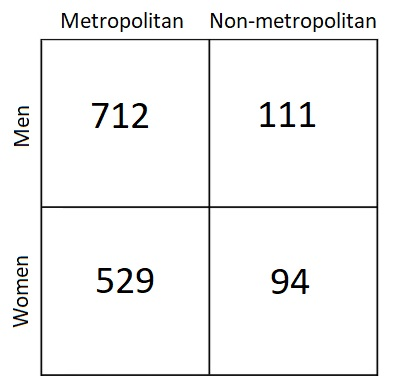
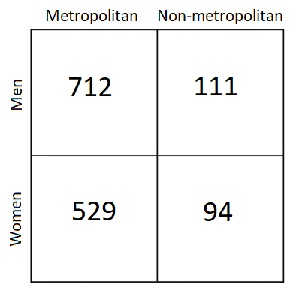
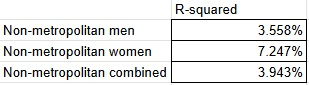

### Analysis 1 Details

#### Sample Sizes

We noted above that 13 respondents (5 men and 8 women) were coded with metropolitan status "other". They were included in three regressions – for the entire sample, for all men, and for all women – and excluded from any regression where metropolitan status was taken into account. Aside from those 13, the size breakdown of the four groups was:

![Number of respondents for each of four groups. Metropolitan men: 712, Non-metropolitan men: 111, Metropolitan women: 529, Non-metropolitan women: 94]()

#### Averages for subsets

Average commute time differs from one group to another, consistent with our motivation for stratifying the sample by demographic category. Here we have the summary statistics for each variable in the analysis, broken down by group:

![Work_travel summary for each of nine groups]()

![Age summary for each of nine groups]()

![Weekly earnings summary for each of nine groups]()

![Yearly household income summary for each of nine groups]()

![Multiple jobs percent for each of nine groups]()

#### Overall model fit

In general, the regressions showed that these demographic factors have very limited explanatory power in accounting for the variation in commute times. Our R squared statistic was generally less than 1%, except when we focused on non-metropolitan commuters. In those cases the model still had limited explanatory power, with values:

<img src = "/kaggle/input/dddtw-images/Analysis_1_r_squared.jpg" width="500">
![R-squraed statistic for each of nine groups. Metropolitan men: 0.52%, Non-metropolitan men: 3.56%, Combined men: 0.60%, Metropolitan women: 0.96%, Non-metropolitan women: 7.25%, Combined women: 0.72%, Combined metropolitan: 0.65%, Combined non-metropolitan: 3.94%, Combined total: 0.72%](/kaggle/input/dddtw-images/Analysis_1_r_squared.jpg)

Thus, even in our best-fitting case, 92.75% of the variation in travel_time is explained by factors other than our predictor variables.

#### p-Values

As far as the individual predictors, none had significant predictive power across the board, but some predictors were significant in certain groups. Here are the p-values for the coefficients of each predictor in each group:

<img src = "/kaggle/input/dddtw-images/Analysis 1 age p values.jpg" width="500">

![age p-value for each of nine groups](/kaggle/input/dddtw-images/Analysis_1_age_p_values.jpg)

![week_ern p-value for each of nine groups](/kaggle/input/dddtw-images/Analysis 1 week_ern p values.jpg)

![year_inc p-value for each of nine groups](/kaggle/input/dddtw-images/Analysis 1 year_inc p values.jpg)

![multi_jobs p-value for each of nine groups](/kaggle/input/dddtw-images/Analysis 1 multi_jobs p values.jpg)

* The p-value for age as a predictor is approximately 0.013 among non-metropolitan women, indicating clear significance at the 95% level. The corresponding slope is about -0.54
  
* The p-value for mult_jobs as a predictor is approximately 0.028 among metropolitan residents (combined sexes), again indicating significance at the 95% level. The corresponding slope is about 7.55.

* We note that we have a small p-value for week_ern when we look at the entire sample, but not when we restrict our attention to any of the stratified groups. This is a reflection of the systematic difference in weekly earings between groups, which lines up with the differences in commute times seen above. The week_ern averages, by group are:

  ![week_ern average for each of nine groups]()

  Therefore, we do not consider this result significant in terms of the current analysis. The apparent relationship between weekly earnings and work travel is actually mediated by the demographic factors of sex and metropolitan status.

## Analysis 2 – Commute Time and Well-Being

### Summary

In this analysis, we use work travel time (`work_travel`) as our predictor variable, and we look at its possible influence on a variety of well-being related variables:

* `life_rating` – responses to a survey question about overall life rating
* `gen_health` – respondents' self-reporting of their general health status
* `happy` – weighted average of responses when respondents were asked how happy they felt during three randomly selected activities on their diary day
* `sad` – same as `happy`, but for sadness
* `stress` – same as `happy` and `sad`, but for stress level

For details about how the weighted averages work, please see above, under "Data Preparation: Second Sample"

All of ohat our outcome variables are ordinal, rather than continuous interval vari.tool. "Points on a rating scale" are not measured values in the way that "minutes of travel" Thus, it does not make sense to use linear regression, so instead we use logistic regression, a statistical tool that works well with binary variables. In order to do this, ore, we mare out outcome variables binary by "dichotomizing" tFor details about how we handled these variables, please see above, under "Data Cleaning: Ordinal Variables".

Carrying out the logistic regressions, we find that in each case, `work_travel` has no significant correlation with these measures of well-being.

The significance of this analysis is, interestingly, its lack of significant results. We learn that, if we want to predict whether someone rates their life or health as good or bad, whether they're more likely to feel happy, or sad, or stressed, then simply looking at how long they travel to work gives us no useful information.hem. 

### Analysis 2 details

#### Summary of variables

In this analysis, we worked with a total of N=1227 observations.

**Work travel time**

* mean: 45.2
* std dev: 40.3
  
<!-- This comment breaks up the list -->

* min: 1
* Q1: 20
* med: 35
* Q3: 60
* max: 559

**Outcome variables**

![Outcome variable summaries]()

**Logistic regressions**

![Analysis 2 all p-values]()

As you can see, there is no significant correlation between `work_travel` and any of the outcome variables we examined here.

## Analysis 3 – Commuting Stress and Well-Being

### Summary

Here, we consider not only the quantity of commute time but also its quality, in particular, how stressful the commuters find it to be. In order to look at commuting stress, we look at a subset of our sample consisting of respondents who not only participated in the Well-Being Module of the ATUS, but for whom commuting was among the three randomly selected activities in which they were asked to rate their moods. The sample we obtain in this way is smaller than the previous samples (N=533), but still large enough for meaningful analysis.

For these participants, we examine the associations between `work_travel` and three outcome variables `life_rating`, `gen_health`, and `hyper_tens`, much as in the previous analysis. We have seen the first two of these already, and `hyper_tens` is based on the survey question, "In the last five years, were you ever told by a doctor or other health professional that you have hypertension, also called high blood pressure, or borderline hypertension?"

This time, however, we divide the sample into groups according to how they rated their commuting stress compared with their overall life stress.

* Group 1 - Those who did not report feeling stress, either commuting or otherwise
* Group 2 - Those who reported commuting stress at a *lower* level than general stress
* Group 3 - Those who reported commuting stress at *about the same* level as general stress
* Group 4 - Those who reported commuting stress at a *higher* level than general stress?sFinally, we perform a logistic regressions for each outcome variable against travel time, this time considering intersections with the four groups. (See below for details.)

Our regression analysis yields two notable results. Neither is strongly statistically significant, but both are suggestive.

* Among those who reported no stress, commuting is associated with a slight increase in the liklihood of having a high life rating (8, 9, or 10). Quantitatively, a respondent who commuted 10 minutes longer than another has odds of reporting a life rating of 8, 9, or 10 that are 6.5% higher. This suggests that, when life is not stressful, and the travel is not stressful, a longer commute can be associated with high life satisfaction. Whether there is a causal relationship remains unclear, but we do see a moderate association.
* Amongh those who rated commuting stress as higher than life stress in general, we see a moderate association between work travel time and a lower general health rating. Among this group, a respondent who commuted 10 minutes longer than another has odds of reporting their general health level as "excellent" or "very good" that were about 6% lower.



### Analysis 3 details

First, we realize when taking commuting stress into account in this analysis that it is likely to be highly correlated with general stress. We therefore calculate Spearman's Rank Correlation Coefficient between `car_stress` and `stress`, and obtain a value of ρ ≈ 0.738. This indicates a moderate-to-strong correlation, so when dividing the group up for intersectional analysis, we take into account the relationship between these two variables.

With that in mind we split our subset of respondents into the following four groups, which are roughly equinumerous:

* Group 1 (`car_stress` = `stress` = 0): N=138
* Group 2 (`car_stress` << `stress`) N=132
* Group 3 (`car_stress` ≈ `stress` ≠ 0) N=127
* Group 4 (`car_stress` >> `stress`) N=136

The response variables `life_rating` and `gen_health` are dichotomized just as in Analysis 2, and `hyper_tens` is a binary variable at the outset.

For the regression, we construct four dummy variables to use as predictors:

* `gp_1_travel` = `work_travel` if in group 1, else 0
* `gp_2_travel` = `work_travel` if in group 2, else 0
* `gp_3_travel` = `work_travel` if in group 3, else 0
* `gp_4_travel` = `work_travel` if in group 4, else 0

Running logistic regressions for each response variable against these four predictors, we obtain the following p-values:

![Analysis 3 all p-values]()

As you can see, at the α = 0.05 significance level, none of the results is significant, but if we choose a sligtly higher significance level, such as α = 0.10, then we do have two significant results, for `life_rating` in group 1, and for `gen_health` in group 4.

Looking at our coefficients for these two variables, we see that each extra minute of `work_travel` increases the average log odds of responding 8, 9, or 10 to the life rating question by about 0.0065, for those in group 1. For those in group 4, the same one-minute increase decreses the log odds of responding "excellent" or "very good" to the general health question by about 0.0060. Multiplying by 10 and exponentiating, we obtain the interpretation that a 10-minute incresase in `work_travel` corresponds to a 6.5% increase and a 6.0% decrease, respectively, in the actual odds of these responses.

## Analysis 4 – Commuting and Sleep

### Summary

After the previouis analyses, we put this study to bed with a look at the effects of commuting on sleep. From the ATUS, we have data on how many minutes respondents slept during the 24-hour period of their diary day. We are looking, in this analysis, to see whether there is are correlations between sleep time and commuting time, and between sleep time and commuting stress.

We carry out a linear regression, with one response variable (`sleep_time`) and two predictor variables (`work_travel` and `car_stress`). We treat `car_stress` as a binary variable: commuting without stress (average stress rating less than 2) versus commuting with stress (average stress rating 2-6).

Running this analysis, we find that most variance in sleep time is due to factors other than those considered here. Sleep time can be affected by nearly anything going on in one's life, including physical and mental health, lifestlye and habits, obligations that arise, family affairs, or just the fact that a good movie was on that night. We find that only about 1.5% of the variance in sleep time is explained by commuting time and stress.

However, when it comes to explaining that 1.5%, there are clear, significant correlations of both predictor variables with sleep time. Indeed, for 5 minutes of increase in work travel time, we see that the average amount of sleep decreases by 1 minute. Furthermore, those who rated work travel as stressful slept an average of 21 minutes less than those whose did not rate work travel as stressful.

### Analysis 4 Details

For this analysis, we have a sample size of N=533

#### Summaries of variables

`work_travel` (in minutes):
* mean ≈ 52.08
* st. dev. ≈ 47.21
* 5-number summary: 5, 25, 40, 60, 559

The maximum `work_travel` value is a bit of an outlier, being more than twice the next highest value. However, omitting that observation from the regression does not affect the results significantly, so we leave it in.

`car_stress`

A value of 0 indicates average reported stress during work travel less than 2 (on a 0-6 scale), and a value of 1 indicates average reported stress during work travel at least 2.

* 0 - 53.85%
* 1 - 46.15%

`sleep_time` (in minutes)
* mean ≈ 481.82
* st. dev. ≈ 112.46
* 5-number summary: 0, 420, 480, 540, 1095

As above, omitting the observation of the person who slept over 18 hours doesn't change the outcome in any significant way.

#### Regression outcome

* Adjusted R square ≈ 0.0151
* Coefficient for `work_travel` ≈ -0.22, with p-value ≈ 0.032
* Coefficient for `car_stress` ≈ -21.07, with p-value ≈ 0.031

# Discussion and Conclusion

Looking back at all four analyses, what have we learned about commuting?

From our first analysis, we saw that while socioeconomic factors can affect one's time spent traveling to a job, there are many other variables in the equation, and that both men and women experience commutes both long and short, in the city and in the country. That some people just have to travel a long way to work, while others do not, is a near-universal aspect of working, no matter what group of workers we're talking about. Working multiple jobs in a city is likely to result in more work travel time, and settling in to some kind of work at home, or close to home, as many rural residents do, save save on commute time, but he fact of having to travel for one's job cuts across lines of demographic and socioeconomic categories.

If we simply ask whether more time traveling to work is correlated with better or worse well-being, we do not see any clear, significant correlation. It is not simply a matter of more time spent commuting translating into poorer health, or lower life satisfaction. From our second analysis, we see that in order to tease out the real effect of commutes on our lives, we need to look at the question in a more refined way.

In refining the way we interrogate the data, we found in our third analysis that the quality of a commute can make its quantity much more significant, either for better or for worse! For commuters who experience little to no stress – either during the commute or in general – the extra travel time appears to provide for more life satisfaction, in a small but meaningful way. Whether it's due to pleasant carpool company, a relaxing and scenic drive, or just the opportunity to listen to the right music and mentally prepare for the work day, some commutes can be associated with higher general life ratings.

At the same time, the group for whom commuting is one of the more stressful parts of the day appears to pay the price for this difficult time being extended, with longer stressful commutes being correlated with lower general health ratings. When someone gets to work and says, "the traffic this morning was murder", they might be speaking more literally than you realize!

Finally, we found that we can quantify, in a meaningful way, the amount of sleep that we lose due to commuting. Long, stressful commutes are significantly correlated with getting less sleep at night.

Where do these findings point us now? If we are looking to address people's work travel, via public transportation policy for example, our findings here indicate how we can maximize the effectiveness of our efforts in improving public health and well-being. To the extent we can, we might focus on people in cities, who work multiple jobs, for there are the circumstances that tend to be associated with more work travel. Additionally, we need to consider not only the length of a commute, but also the stressfulness of it. In particular, we note that a less stressful commute, even if it takes longer, can potentially increase the amount of rest that commuters are getting. Commuters who are informed about this tradeoff between quality and quantity might be empowered to make choices that would benefit them, and in turn, everyone they work with.

# Appendix